<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃헙 저장소](https://github.com/greentec/tensorflow-2-tutorial)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃헙 저장소의 [Issues](https://github.com/greentec/tensorflow-2-tutorial/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

In [0]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

TensorFlow 2.x selected.


# 9.2 MNIST 데이터세트에 적용하기

In [0]:
# 9.1 MNIST 데이터세트 불러오기
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

(60000, 28, 28) (60000,)


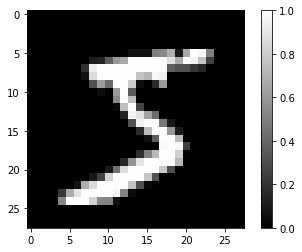

5


In [0]:
# 9.2 MNIST 데이터세트 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [0]:
# 9.3 Dense 오토인코더 모델 정의
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

(60000, 784) (60000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 9.4 Dense 오토인코더 모델 학습
model.fit(train_X, train_X, epochs=10, batch_size=256)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0495
Epoch 2/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0166
Epoch 3/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0118
Epoch 4/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0097
Epoch 5/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0085
Epoch 6/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0078
Epoch 7/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0072
Epoch 8/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0068
Epoch 9/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0065
Epoch 10/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0062


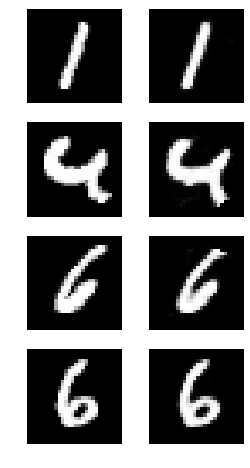

10000/10000 [==============================] - 1s 55us/sample - loss: 0.0060


0.0059854574166238305

In [0]:
# 9.5 test 데이터로 Dense 오토인코더의 이미지 재생성
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

In [0]:
# 9.6 컨볼루션 오토인코더 모델 정의
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_4 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)       

In [0]:
# 9.7 컨볼루션 오토인코더 모델 학습
model.fit(train_X, train_X, epochs=20, batch_size=256)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0777
Epoch 2/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0307
Epoch 3/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0240
Epoch 4/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0218
Epoch 5/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0208
Epoch 6/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0202
Epoch 7/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0199
Epoch 8/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0196
Epoch 9/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0194
Epoch 10/20
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0192
Epoch 11/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0191
Epoch 1

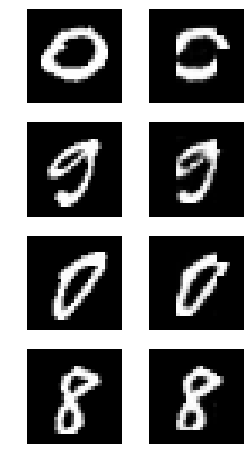

10000/10000 [==============================] - 1s 76us/sample - loss: 0.0182


0.01815639177262783

In [0]:
# 9.8 test 데이터로 컨볼루션 오토인코더의 이미지 재생성
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

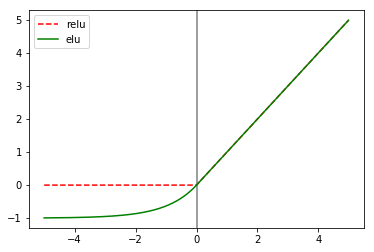

In [0]:
# 그림 9.7 출력 코드
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

# plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

In [0]:
# 9.9 활성화함수를 elu로 바꾼 컨볼루션 오토인코더 모델 정의 및 학습
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(7*7*64, activation='elu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

model.fit(train_X, train_X, epochs=20, batch_size=256)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0573
Epoch 2/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0187
Epoch 3/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0130
Epoch 4/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0111
Epoch 5/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0102
Epoch 6/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0095
Epoch 7/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0090
Epoch 8/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0086
Epoch 9/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0083
Epoch 10/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0080
Epoch 11/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0078
Epoch 1

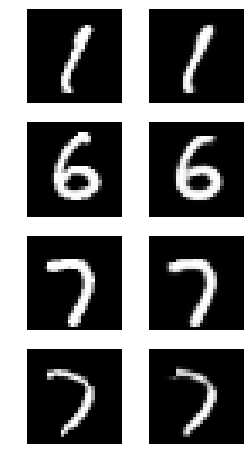

10000/10000 [==============================] - 1s 74us/sample - loss: 0.0053


0.005275812551379204

In [0]:
# 9.10 test 데이터로 컨볼루션 오토인코더의 이미지 재생성
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

# 9.3 클러스터링(Clustering)

## 9.3.1 K-평균 클러스터링(K-Means Clustering)

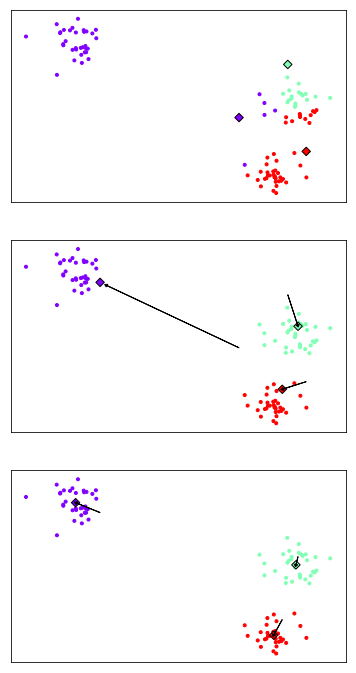

In [0]:
# 그림 9.8 출력 코드
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, Y = make_blobs(random_state=6)
pred_Y = np.zeros_like(Y)

fig = plt.figure(figsize=(6,12))

centers = []
for c in range(3):
    center_X = random.random() * (max(X[:,0]) - min(X[:,0])) + min(X[:,0])
    center_Y = random.random() * (max(X[:,1]) - min(X[:,1])) + min(X[:,1])
    centers.append([center_X, center_Y])
centers = np.array(centers)
prev_centers = []

for t in range(3):
    for i in range(len(X)):
        min_dist = 9999
        center = -1
        for c in range(3):
            dist = ((X[i,0] - centers[c,0]) ** 2 + (X[i,1] - centers[c,1]) ** 2) ** 0.5
            if dist < min_dist:
                min_dist = dist
                center = c
        pred_Y[i] = center
    
    ax = fig.add_subplot(3, 1, t+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(X[:,0], X[:,1], marker='.', c=pred_Y, cmap='rainbow')
    ax.scatter(centers[:,0], centers[:,1], marker='D', c=range(3), cmap='rainbow', edgecolors=(0,0,0,1))
    
    if len(prev_centers) != 0:
        for c in range(3):
            ax.arrow(prev_centers[c,0], prev_centers[c,1], (centers[c,0]-prev_centers[c,0])*0.95, (centers[c,1]-prev_centers[c,1])*0.95, head_width=0.25, head_length=0.2, fc='k', ec='k')
    
    # update center
    prev_centers = np.copy(centers)
    for c in range(3):
        count = len(pred_Y[pred_Y == c])
        centers[c,0] = sum(X[pred_Y == c, 0]) / (count+1e-6)
        centers[c,1] = sum(X[pred_Y == c, 1]) / (count+1e-6)

plt.show()

In [0]:
# 9.11 잠재변수 추출 모델 정의 및 실행
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

(60000, 64)
[ 1.6825491  -1.         -1.         -0.99999875  5.9386067  21.320614
 -0.99999994 30.034842   -1.         18.787436   -1.         -0.99998236
 13.555177   12.923244    3.6811016  35.412853   -1.          9.410021
 20.77275    12.479184   30.154959   11.646389    4.926412   -0.99999917
 -1.         -0.99999994 36.585896   -1.         -0.99999994 -0.99999994
 30.369444   25.859472   25.817783   28.017693   -1.         22.324255
 -0.99999994 -0.74865067 -1.          7.0557995  10.752137   -0.99999994
 -1.         -1.         13.469817    9.511806   29.50209    -0.99999994
 -1.         -1.         34.686687   -0.9999999  -0.99999994  1.8496717
 -1.         -1.         -0.99809915 -1.         11.176546   -0.99999964
 14.826883   -1.         39.610825   25.53981   ]


In [0]:
# 9.12 사이킷 런의 K-평균 클러스터링 알고리즘 사용
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vector)

CPU times: user 15.5 s, sys: 3.43 s, total: 18.9 s
Wall time: 15 s


In [0]:
# 9.13 계산 결과 확인
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

[2 6 9 ... 2 3 1]
(10, 64)
[ 4.7548676  13.431524    6.2051277  15.212539   -0.9999993  28.263012
 -0.9999998  10.686242   32.29382    22.513603   13.039814    3.373564
 -0.99999994 -0.99999946  9.978241   -0.9999997  -0.99999994 12.556601
 13.438148   14.604626   21.511175   16.33787    12.463704    6.0560184
 18.548063   14.258218   -0.99999976 25.333893   -0.99999994 -0.9999886
 16.123072   -0.9999995  -0.9999999   1.6346567  12.673654   12.607783
 -0.99999994 21.103655   11.583251   -0.9730686  18.5236      5.6441393
 -0.99999946 15.016914   -0.99999994 -0.99999994 22.53481    -0.9999997
 -0.9999994  11.146671   19.024158   19.247852   23.264706   -0.99999964
 15.686707   11.915498   -0.99999934 22.055107   14.567615   -0.9999089
 -0.99999976 -0.99999964 -0.99999946 16.628351  ]


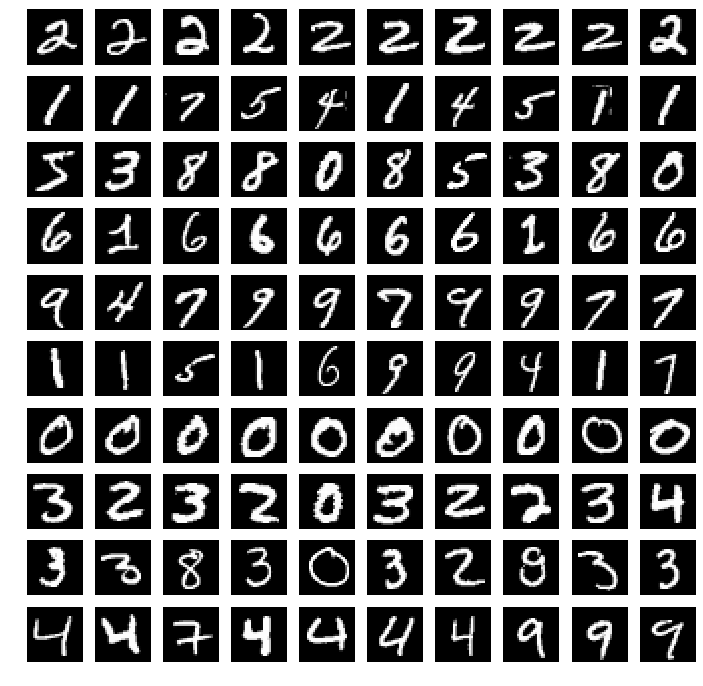

In [0]:
# 9.14 클러스터링 결과 출력
plt.figure(figsize=(12,12))

for i in range(10):
    images = train_X[kmeans.labels_ == i]
    for c in range(10):
        plt.subplot(10, 10, i*10+c+1)
        plt.imshow(images[c].reshape(28,28), cmap='gray')
        plt.axis('off')
        
plt.show()

## 9.3.2 t-SNE

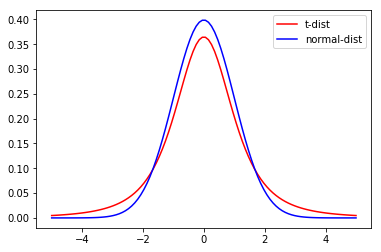

In [0]:
# 그림 9.9 출력 코드
import scipy as sp
t_dist = sp.stats.t(2.74)
normal_dist = sp.stats.norm()

x = np.linspace(-5, 5, 100)
t_pdf = t_dist.pdf(x)
normal_pdf = normal_dist.pdf(x)
plt.plot(x, t_pdf, c='red', label='t-dist')
plt.plot(x, normal_pdf, c='blue', label='normal-dist')
plt.legend()
plt.show()

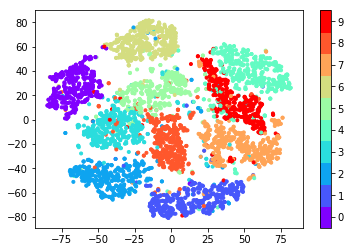

CPU times: user 41.2 s, sys: 607 ms, total: 41.8 s
Wall time: 41.5 s


In [0]:
# 9.15 사이킷 런의 t-SNE 사용
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

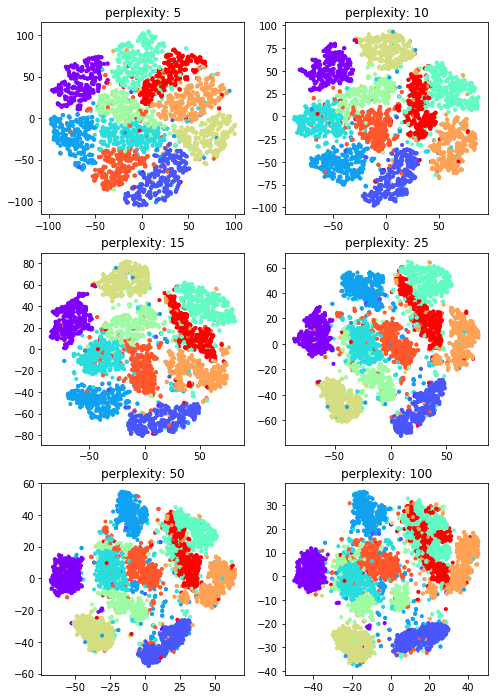

CPU times: user 5min 6s, sys: 3.48 s, total: 5min 9s
Wall time: 5min 7s


In [0]:
# 9.16 다양한 perplexity 인수에 대한 t-SNE 결과
%%time

perplexities = [5, 10, 15, 25, 50, 100]
plt.figure(figsize=(8,12))

for c in range(6):
    tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
    tsne_vector = tsne.fit_transform(latent_vector[:5000])

    plt.subplot(3, 2, c+1)
    plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
    plt.title('perplexity: {0}'.format(perplexities[c]))

plt.show()

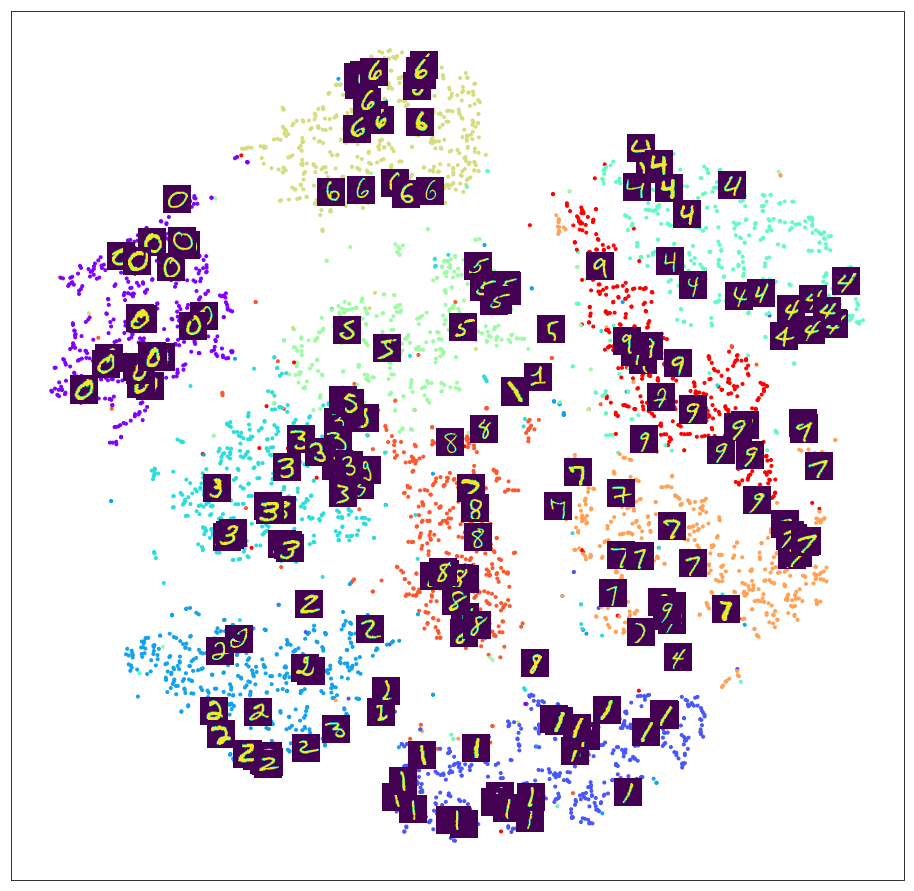

In [0]:
# 9.17 t-SNE 클러스터 위에 MNIST 이미지 표시
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize=(16,16))

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
for i in range(200):
    imagebox = OffsetImage(train_X[i].reshape(28,28))
    ab = AnnotationBbox(imagebox, (tsne_vector[i,0], tsne_vector[i,1]), frameon=False, pad=0.0)
    ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
plt.show()

# 9.4 초해상도(Super Resolution) 이미지 얻기

In [0]:
# 9.18 BSD500 데이터세트 불러오기
tf.keras.utils.get_file('/content/bsd_images.zip', 'http://bit.ly/35pHZlC', extract=True)

!unzip /content/bsd_images.zip

In [0]:
# 9.19 이미지 경로 저장 및 확인
import pathlib
image_root = pathlib.Path('/content/images')

all_image_paths = list(image_root.glob('*/*'))
print(all_image_paths[:10])

[PosixPath('/content/images/train/198004.jpg'), PosixPath('/content/images/train/236017.jpg'), PosixPath('/content/images/train/20008.jpg'), PosixPath('/content/images/train/41004.jpg'), PosixPath('/content/images/train/225017.jpg'), PosixPath('/content/images/train/41025.jpg'), PosixPath('/content/images/train/65074.jpg'), PosixPath('/content/images/train/112082.jpg'), PosixPath('/content/images/train/134052.jpg'), PosixPath('/content/images/train/8143.jpg')]


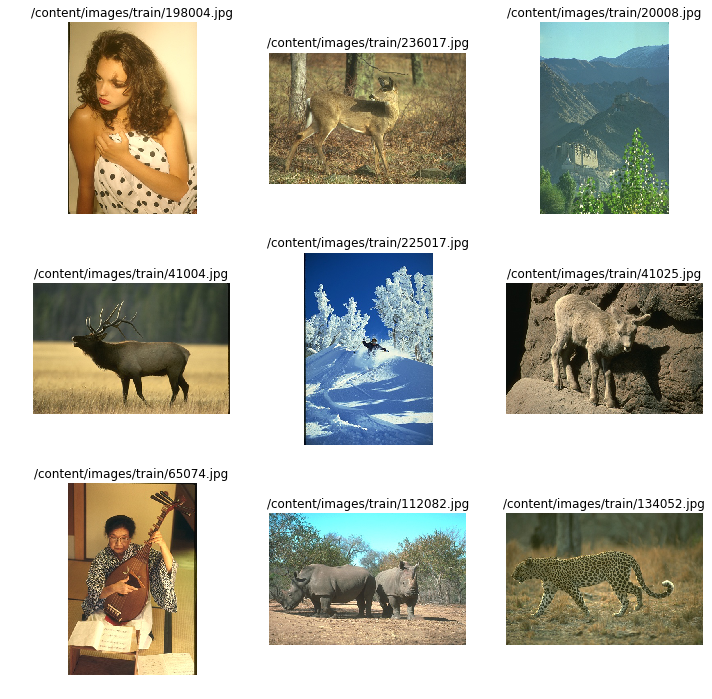

In [0]:
# 9.20 이미지 확인
import PIL.Image as Image
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for c in range(9):
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread(all_image_paths[c]))
    plt.title(all_image_paths[c])
    plt.axis('off')
plt.show()

In [0]:
# 9.21 이미지 경로 분리 저장
train_path, valid_path, test_path = [], [], []

for image_path in all_image_paths:
    if str(image_path).split('.')[-1] != 'jpg':
        continue
    
    if str(image_path).split('/')[-2] == 'train':
        train_path.append(str(image_path))
    elif str(image_path).split('/')[-2] == 'val':
        valid_path.append(str(image_path))
    else:
        test_path.append(str(image_path))

In [0]:
# 9.22 원본 이미지에서 조각을 추출하고 입력, 출력 데이터를 반환하는 함수 정의
def get_hr_and_lr(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    hr = tf.image.random_crop(img, [50, 50, 3])
    lr = tf.image.resize(hr, [25, 25])
    lr = tf.image.resize(lr, [50, 50])
    return lr, hr

In [0]:
# 9.23 train, valid Dataset 정의
train_dataset = tf.data.Dataset.list_files(train_path)
train_dataset = train_dataset.map(get_hr_and_lr)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(16)

valid_dataset = tf.data.Dataset.list_files(valid_path)
valid_dataset = valid_dataset.map(get_hr_and_lr)
valid_dataset = valid_dataset.repeat()
valid_dataset = valid_dataset.batch(1)

In [0]:
# 9.24 tf.keras의 함수형 API를 사용한 REDNet 네트워크 정의
def REDNet(num_layers):
    conv_layers = []
    deconv_layers = []
    residual_layers = []

    inputs = tf.keras.layers.Input(shape=(None, None, 3))
    conv_layers.append(tf.keras.layers.Conv2D(3, kernel_size=3, padding='same', activation='relu'))

    for i in range(num_layers-1):
        conv_layers.append(tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
        deconv_layers.append(tf.keras.layers.Conv2DTranspose(64, kernel_size=3, padding='same', activation='relu'))

    deconv_layers.append(tf.keras.layers.Conv2DTranspose(3, kernel_size=3, padding='same'))

    # 인코더 시작
    x = conv_layers[0](inputs)

    for i in range(num_layers-1):
        x = conv_layers[i+1](x)
        if i % 2 == 0:
            residual_layers.append(x)

    # 디코더 시작
    for i in range(num_layers-1):
        if i % 2 == 1:
            x = tf.keras.layers.Add()([x, residual_layers.pop()])
            x = tf.keras.layers.Activation('relu')(x)
        x = deconv_layers[i](x) 

    x = deconv_layers[-1](x)
    
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

In [0]:
# 9.25 PSNR 정의
def psnr_metric(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

In [0]:
# 9.26 REDNet-30 네트워크 초기화 및 컴파일
model = REDNet(15)
model.compile(optimizer=tf.optimizers.Adam(0.0001), loss='mse', metrics=[psnr_metric])
# 네트워크 시각화
# tf.keras.utils.plot_model(model)

In [0]:
# 9.27 REDNet-30 네트워크 학습
history = model.fit_generator(train_dataset, 
                              epochs=1000, 
                              steps_per_epoch=len(train_path)//16, 
                              validation_data=valid_dataset, 
                              validation_steps=len(valid_path), 
                              verbose=2)

Epoch 1/1000
12/12 - 10s - loss: 0.1444 - psnr_metric: 10.2599 - val_loss: 0.0385 - val_psnr_metric: 15.2512
Epoch 2/1000
12/12 - 4s - loss: 0.0352 - psnr_metric: 15.6859 - val_loss: 0.0313 - val_psnr_metric: 16.9315
Epoch 3/1000
12/12 - 4s - loss: 0.0271 - psnr_metric: 16.9354 - val_loss: 0.0216 - val_psnr_metric: 17.7029
Epoch 4/1000
12/12 - 4s - loss: 0.0223 - psnr_metric: 17.6306 - val_loss: 0.0179 - val_psnr_metric: 18.7593
Epoch 5/1000
12/12 - 4s - loss: 0.0205 - psnr_metric: 18.1852 - val_loss: 0.0166 - val_psnr_metric: 19.1719
Epoch 6/1000
12/12 - 4s - loss: 0.0193 - psnr_metric: 18.4369 - val_loss: 0.0134 - val_psnr_metric: 19.7474
Epoch 7/1000
12/12 - 4s - loss: 0.0170 - psnr_metric: 19.1222 - val_loss: 0.0143 - val_psnr_metric: 19.8824
Epoch 8/1000
12/12 - 4s - loss: 0.0160 - psnr_metric: 19.6557 - val_loss: 0.0124 - val_psnr_metric: 20.2623
Epoch 9/1000
12/12 - 4s - loss: 0.0133 - psnr_metric: 19.9393 - val_loss: 0.0112 - val_psnr_metric: 21.4027
Epoch 10/1000
12/12 - 4s - 

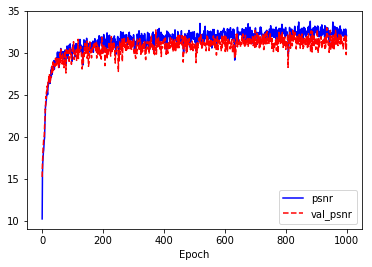

In [0]:
# 9.28 REDNet-30 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['psnr_metric'], 'b-', label='psnr')
plt.plot(history.history['val_psnr_metric'], 'r--', label='val_psnr')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [0]:
# 9.29 test 이미지 super resolution
img = tf.io.read_file(test_path[0])
img = tf.image.decode_jpeg(img, channels=3)
hr = tf.image.convert_image_dtype(img, tf.float32)

lr = tf.image.resize(hr, [hr.shape[0]//2, hr.shape[1]//2])
lr = tf.image.resize(lr, [hr.shape[0], hr.shape[1]])
predict_hr = model.predict(np.expand_dims(lr, axis=0))

print(tf.image.psnr(np.squeeze(predict_hr, axis=0), hr, max_val=1.0))
print(tf.image.psnr(lr, hr, max_val=1.0))

tf.Tensor(25.893595, shape=(), dtype=float32)
tf.Tensor(25.849056, shape=(), dtype=float32)


Text(0.5, 1.0, 'sr')

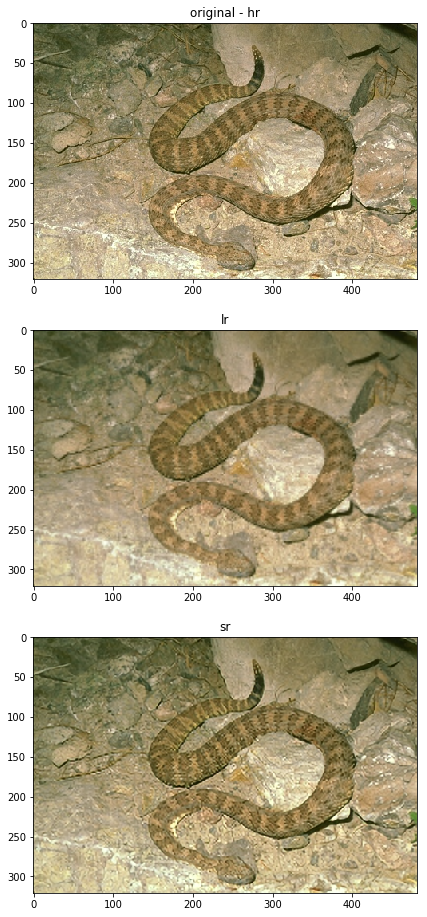

In [0]:
# 9.30 test 이미지 super resolution 결과 확인
plt.figure(figsize=(8,16))

plt.subplot(3, 1, 1)
plt.imshow(hr)
plt.title('original - hr')

plt.subplot(3, 1, 2)
plt.imshow(lr)
plt.title('lr')

plt.subplot(3, 1, 3)
plt.imshow(np.squeeze(predict_hr, axis=0))
plt.title('sr')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(30.224031, shape=(), dtype=float32)
tf.Tensor(24.783773, shape=(), dtype=float32)


Text(0.5, 1.0, 'sr')

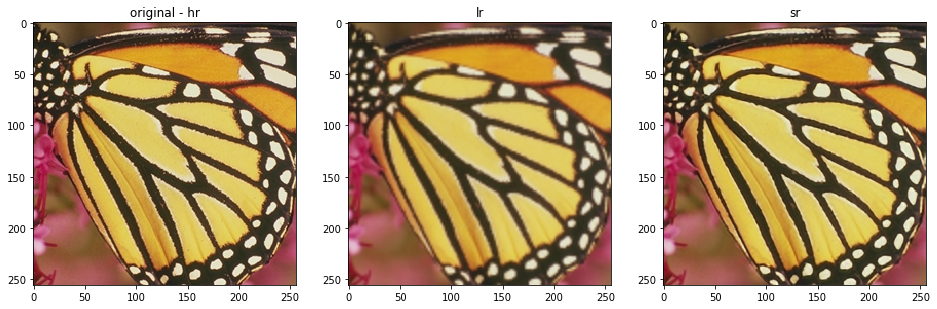

In [0]:
# 9.31 Set5의 나비 이미지 테스트
image_path = tf.keras.utils.get_file('butterfly.png', 'http://bit.ly/2oAOxgH')
img = tf.io.read_file(image_path)
img = tf.image.decode_jpeg(img, channels=3)
hr = tf.image.convert_image_dtype(img, tf.float32)

lr = tf.image.resize(hr, [hr.shape[0]//2, hr.shape[1]//2])
lr = tf.image.resize(lr, [hr.shape[0], hr.shape[1]])
predict_hr = model.predict(np.expand_dims(lr, axis=0))

print(tf.image.psnr(np.squeeze(predict_hr, axis=0), hr, max_val=1.0))
print(tf.image.psnr(lr, hr, max_val=1.0))


plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
plt.imshow(hr)
plt.title('original - hr')

plt.subplot(1, 3, 2)
plt.imshow(lr)
plt.title('lr')

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(predict_hr, axis=0))
plt.title('sr')

In [0]:
# 9.32 확대 비율을 2배에서 4배로 수정, 이미지 보강
import random
def get_hr_and_lr_flip_s4(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    hr = tf.image.random_crop(img, [50, 50, 3])
    lr = tf.image.resize(hr, [12, 12])
    lr = tf.image.resize(lr, [50, 50])
    
    if random.random() < 0.25:
        hr = tf.image.flip_left_right(hr)
        lr = tf.image.flip_left_right(lr)
    if random.random() < 0.25:
        hr = tf.image.flip_up_down(hr)
        lr = tf.image.flip_up_down(lr)
    
    return lr, hr

In [0]:
# 9.33 REDNet-30 네트워크 학습
train_dataset = tf.data.Dataset.list_files(train_path)
train_dataset = train_dataset.map(get_hr_and_lr_flip_s4)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(16)

valid_dataset = tf.data.Dataset.list_files(valid_path)
valid_dataset = valid_dataset.map(get_hr_and_lr_flip_s4)
valid_dataset = valid_dataset.repeat()
valid_dataset = valid_dataset.batch(1)

model = REDNet(15)
model.compile(optimizer=tf.optimizers.Adam(0.0001), loss='mse', metrics=[psnr_metric])

history = model.fit_generator(train_dataset, 
                              epochs=4000, 
                              steps_per_epoch=len(train_path)//16, 
                              validation_data=valid_dataset, 
                              validation_steps=len(valid_path), 
                              verbose=2)

Epoch 1/4000
12/12 - 9s - loss: 0.1129 - psnr_metric: 11.0987 - val_loss: 0.0388 - val_psnr_metric: 14.9682
Epoch 2/4000
12/12 - 4s - loss: 0.0269 - psnr_metric: 16.8269 - val_loss: 0.0251 - val_psnr_metric: 17.1241
Epoch 3/4000
12/12 - 4s - loss: 0.0215 - psnr_metric: 17.7234 - val_loss: 0.0190 - val_psnr_metric: 18.1898
Epoch 4/4000
12/12 - 4s - loss: 0.0185 - psnr_metric: 18.4825 - val_loss: 0.0179 - val_psnr_metric: 18.1955
Epoch 5/4000
12/12 - 4s - loss: 0.0176 - psnr_metric: 18.4759 - val_loss: 0.0124 - val_psnr_metric: 20.0983
Epoch 6/4000
12/12 - 4s - loss: 0.0149 - psnr_metric: 19.4861 - val_loss: 0.0120 - val_psnr_metric: 20.0231
Epoch 7/4000
12/12 - 4s - loss: 0.0130 - psnr_metric: 20.2642 - val_loss: 0.0109 - val_psnr_metric: 20.7198
Epoch 8/4000
12/12 - 4s - loss: 0.0114 - psnr_metric: 21.0896 - val_loss: 0.0082 - val_psnr_metric: 22.0825
Epoch 9/4000
12/12 - 4s - loss: 0.0101 - psnr_metric: 21.8502 - val_loss: 0.0115 - val_psnr_metric: 20.7864
Epoch 10/4000
12/12 - 4s - l

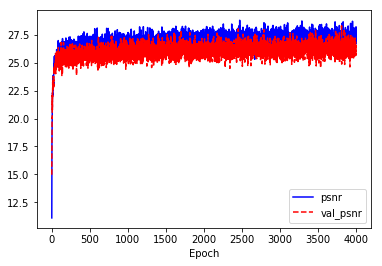

In [0]:
# REDNet-30 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['psnr_metric'], 'b-', label='psnr')
plt.plot(history.history['val_psnr_metric'], 'r--', label='val_psnr')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(22.255482, shape=(), dtype=float32)
tf.Tensor(20.217585, shape=(), dtype=float32)


Text(0.5, 1.0, 'sr')

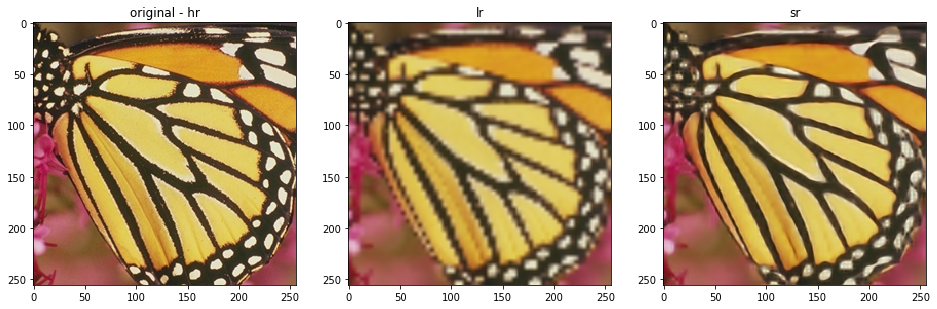

In [0]:
# Set5의 나비 이미지 테스트
image_path = tf.keras.utils.get_file('butterfly.png', 'http://bit.ly/2oAOxgH')
img = tf.io.read_file(image_path)
img = tf.image.decode_jpeg(img, channels=3)
hr = tf.image.convert_image_dtype(img, tf.float32)

lr = tf.image.resize(hr, [hr.shape[0]//4, hr.shape[1]//4])
lr = tf.image.resize(lr, [hr.shape[0], hr.shape[1]])
predict_hr = model.predict(np.expand_dims(lr, axis=0))

print(tf.image.psnr(np.squeeze(predict_hr, axis=0), hr, max_val=1.0))
print(tf.image.psnr(lr, hr, max_val=1.0))


plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
plt.imshow(hr)
plt.title('original - hr')

plt.subplot(1, 3, 2)
plt.imshow(lr)
plt.title('lr')

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(predict_hr, axis=0))
plt.title('sr')

In [0]:
# 9.34 Set5 이미지 불러오기
image_path = tf.keras.utils.get_file('/content/Set5.zip', 'http://bit.ly/2MEG4kr')
!unzip Set5.zip

860160/852576 [==============================] - 0s 0us/step
Archive:  Set5.zip
   creating: Set5/
 extracting: Set5/baby.png           
 extracting: Set5/bird.png           
 extracting: Set5/butterfly.png      
 extracting: Set5/head.png           
  inflating: Set5/woman.png          


In [0]:
# 9.35 Set5 이미지 PSNR 점수 확인
set5_image_root = pathlib.Path('/content/Set5')
set5_image_paths = list(set5_image_root.glob('*.*'))

sr_psnr = []
lr_psnr = []

for image_path in set5_image_paths:
    img = tf.io.read_file(str(image_path))
    img = tf.image.decode_jpeg(img, channels=3)
    hr = tf.image.convert_image_dtype(img, tf.float32)

    lr = tf.image.resize(hr, [hr.shape[0]//4, hr.shape[1]//4])
    lr = tf.image.resize(lr, [hr.shape[0], hr.shape[1]])
    predict_hr = model.predict(np.expand_dims(lr, axis=0))
    
    sr_psnr.append(tf.image.psnr(np.squeeze(predict_hr, axis=0), hr, max_val=1.0).numpy())
    lr_psnr.append(tf.image.psnr(lr, hr, max_val=1.0).numpy())
    
print('sr:', sr_psnr)
print('sr mean:', np.mean(sr_psnr))
print()
print('lr:', lr_psnr)
print('lr mean:', np.mean(lr_psnr))

sr: [27.994066, 25.603968, 30.219433, 22.255482, 28.59956]
sr mean: 26.934504

lr: [27.31659, 24.495182, 29.72251, 20.217585, 28.569517]
lr mean: 26.064276


# 9.5 이미지 분할(Segmentation)

In [0]:
# 9.36 Oxford Pet Dataset 불러오기
import tensorflow_datasets as tfds
dataset, info = tfds.load('oxford_iiit_pet:3.0.0', with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.0.0.incomplete6T5KZ3/oxford_iiit_pet-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.0.0.incomplete6T5KZ3/oxford_iiit_pet-test.tfrecord



Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.0.0. Subsequent calls will reuse this data.


In [0]:
# 9.37 Dataset 정보 확인
info

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    version=3.0.0,
    description='The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
images for each class. The images have large variations in scale, pose and
lighting. All images have an associated ground truth annotation of breed.
',
    urls=['http://www.robots.ox.ac.uk/~vgg/data/pets/'],
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
    }),
    total_num_examples=7349,
    splits={
        'test': 3669,
        'train': 3680,
    },
    supervised_keys=('image', 'label'),
    citation="""@InProceedings{parkhi12a,
      author       = "Parkhi, O. M. and Vedaldi, A. and Zisserman, A. and Jawahar, C.~V.",
      title        = "Cats and Dogs",
      booktitle    =

In [0]:
# 9.38 train, test 데이터 수 저장
train_data_len = info.splits['train'].num_examples
test_data_len = info.splits['test'].num_examples

In [0]:
# 9.39 이미지 로드 함수 정의
def load_image(datapoint):
    img = tf.image.resize(datapoint['image'], (128, 128))
    mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))
    
    img = tf.cast(img, tf.float32)
    img = img / 255.0
    mask -= 1
    
    return img, mask

In [0]:
# 9.40 train, test Dataset 정의
train_dataset = dataset['train'].map(load_image)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(16)

test_dataset = dataset['test'].map(load_image)
test_dataset = test_dataset.repeat()
test_dataset = test_dataset.batch(1)

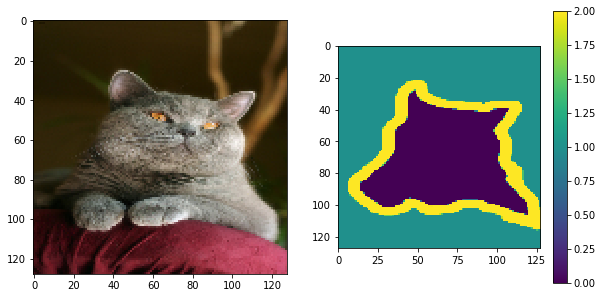

In [0]:
# 9.41 이미지, 마스크 확인
import matplotlib.pyplot as plt
for img, mask in train_dataset.take(1):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img[2])
    
    plt.subplot(1, 2, 2)
    plt.imshow(np.squeeze(mask[2], axis=2))
    plt.colorbar()

In [0]:
# 9.42 Segmentation을 위한 REDNet 네트워크 정의
def REDNet_segmentation(num_layers):
    conv_layers = []
    deconv_layers = []
    residual_layers = []

    inputs = tf.keras.layers.Input(shape=(None, None, 3))
    conv_layers.append(tf.keras.layers.Conv2D(3, kernel_size=3, padding='same', activation='relu'))

    for i in range(num_layers-1):
        conv_layers.append(tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
        deconv_layers.append(tf.keras.layers.Conv2DTranspose(64, kernel_size=3, padding='same', activation='relu'))

    deconv_layers.append(tf.keras.layers.Conv2DTranspose(3, kernel_size=3, padding='same', activation='softmax'))

    x = conv_layers[0](inputs)

    for i in range(num_layers-1):
        x = conv_layers[i+1](x)
        if i % 2 == 0:
            residual_layers.append(x)

    for i in range(num_layers-1):
        if i % 2 == 1:
            x = tf.keras.layers.Add()([x, residual_layers.pop()])
            x = tf.keras.layers.Activation('relu')(x)
        x = deconv_layers[i](x) 

    x = deconv_layers[-1](x)
    
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

In [0]:
# 9.43 Segmentation을 위한 REDNet 네트워크 초기화 및 컴파일
model = REDNet_segmentation(15)
model.compile(optimizer=tf.optimizers.Adam(0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# 9.44 Segmentation을 위한 REDNet 네트워크 학습
history = model.fit(train_dataset,
                    epochs=20,
                    steps_per_epoch=train_data_len//16, 
                    validation_data=test_dataset, 
                    validation_steps=test_data_len)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


230/230 [==============================] - 295s 1s/step - loss: 0.8550 - accuracy: 0.5878 - val_loss: 0.7668 - val_accuracy: 0.6361
Epoch 2/20
230/230 [==============================] - 288s 1s/step - loss: 0.7484 - accuracy: 0.6436 - val_loss: 0.7624 - val_accuracy: 0.6339
Epoch 3/20
230/230 [==============================] - 288s 1s/step - loss: 0.6809 - accuracy: 0.6932 - val_loss: 0.6599 - val_accuracy: 0.7122
Epoch 4/20
230/230 [==============================] - 288s 1s/step - loss: 0.6311 - accuracy: 0.7241 - val_loss: 0.6154 - val_accuracy: 0.7366
Epoch 5/20
230/230 [==============================] - 289s 1s/step - loss: 0.5944 - accuracy: 0.7456 - val_loss: 0.5996 - val_accuracy: 0.7452
Epoch 6/20
230/230 [==============================] - 289s 1s/step - loss: 0.5726 - accuracy: 0.7568 - val_loss: 0.5883 - val_accuracy: 0.7453
Epoch 7/20
230/230 [==============================] - 289s 1s/step - loss: 0.5513 - accuracy: 0.7670 - val_loss: 0.5278 - val_accuracy: 0.7786
Epoch 8/20

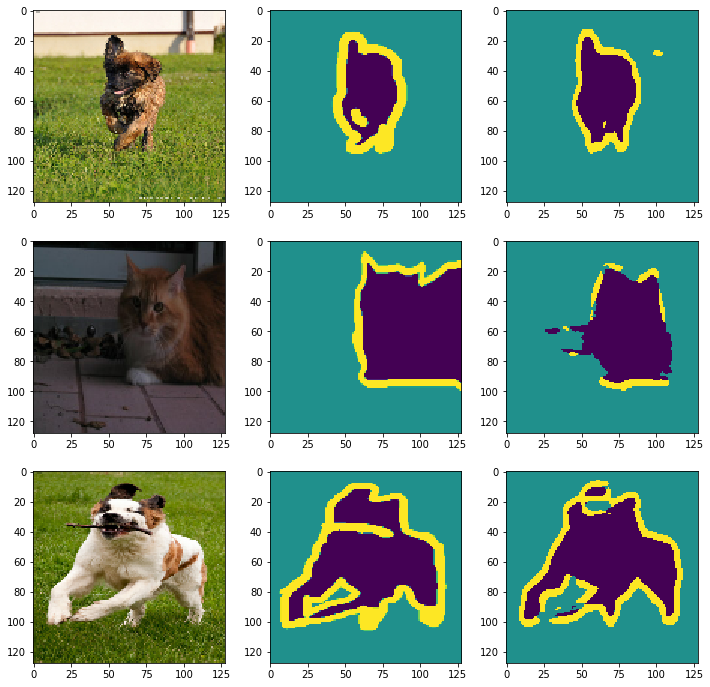

In [0]:
# 9.45 테스트 이미지 분할 확인
plt.figure(figsize=(12, 12))
for idx, (img, mask) in enumerate(test_dataset.take(3)):
    plt.subplot(3, 3, idx*3+1)
    plt.imshow(img[0])
    
    plt.subplot(3, 3, idx*3+2)
    plt.imshow(np.squeeze(mask[0], axis=2))
    
    predict = tf.argmax(model.predict(img), axis=-1)
    plt.subplot(3, 3, idx*3+3)
    plt.imshow(np.squeeze(predict[0], axis=0))

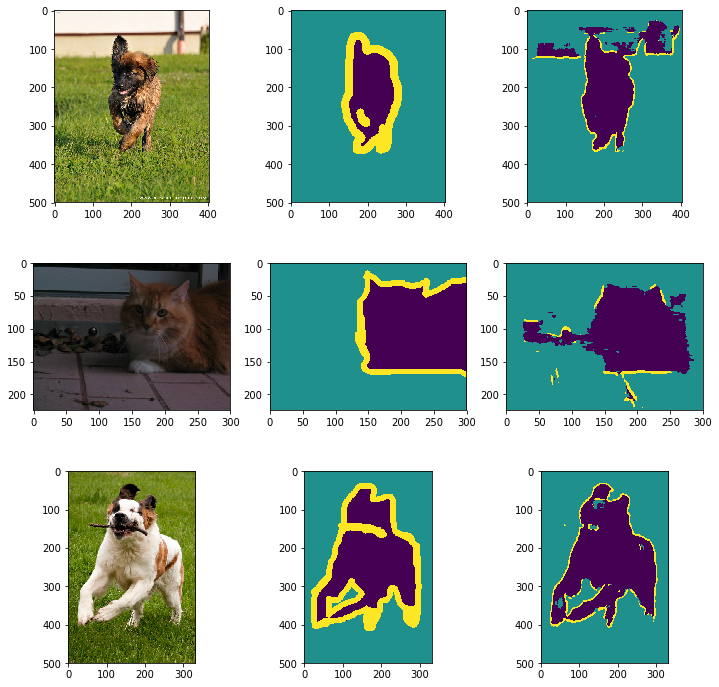

In [0]:
# 9.46 테스트 이미지 분할 확인(원본)
plt.figure(figsize=(12, 12))
for idx, datapoint in enumerate(dataset['test'].take(3)):
    img = datapoint['image']
    mask = datapoint['segmentation_mask']
    
    img = tf.cast(img, tf.float32)
    img = img / 255.0
    mask -= 1
    
    plt.subplot(3, 3, idx*3+1)
    plt.imshow(img)
    
    plt.subplot(3, 3, idx*3+2)
    plt.imshow(np.squeeze(mask, axis=2))
    
    predict = tf.argmax(model.predict(tf.expand_dims(img, axis=0)), axis=-1)
    plt.subplot(3, 3, idx*3+3)
    plt.imshow(np.squeeze(predict[0], axis=0))